# Weston-Watkins SVM (Support Vector Machine)

Úloha zaměřená na implementaci multiclass SVM metodou SGD.


## 4 třídy 

In [1]:
import numpy as np
import usu

npzfile = np.load('data/data_07_4cl.npz')

data = npzfile['data']
ref = npzfile['ref']

data.shape, ref.shape


((1200, 2), (1200, 1))

## Skóre

### pro i-tý vzorek dat (řádkově):
$$ s_{i} = x_{i} \Theta $$

kde $i$ je i-tý prvek ve vstupních datech $X$

Například pokud $x_i$ má velikosti 1x5 (4 přiznaky + 1 sloupec pro bias) a $\Theta$ má velikost 5x3 (3 je počet tříd), pak $s_n$ má velikost 1x3 (3 je počet tříd).

### Maticově:

$$ S = X \Theta $$

Například pokud má $X$ 100 vzorků a tedy velikost 100x10 (pro 9 příznaků + 1 sloupec pro bias) a $\Theta$ má velikost 10x6 (6 je počet tříd), pak $S$ má velikost 100x6 (6 je počet tříd).

In [54]:
def get_scores(data, theta):
    
    #################################################################
    # ZDE DOPLNIT
    s = data @ theta


    return s #for all elements at ones #1200x4
    #################################################################


In [55]:
thetatest = np.array([[1, 4, 2, 3],[1, 7, 2, 5]])
stest = get_scores(data[[0,400,700,1000],:],thetatest)
stest

array([[  1.517202 ,   1.1936388,   3.034404 ,   1.3014932],
       [  5.1639725,  28.1421644,  10.327945 ,  20.4827671],
       [ -2.7890884, -16.4418961,  -5.5781768, -11.8909602],
       [  0.5638176,   9.6845958,   1.1276352,   6.6443364]])

## Vektor $m$ (margins)

### pro i-tý vzorek dat (řádkově):
$$ m_{ij} = s_{ij} - s_{iy_{i}} + 1 $$

kde $y_{i}$ je index spravné třídy a $s_{iy_{i}}$ je skóre spravné třídy

$ m_{iy_i} = 0 $ protože pro spravnou třídu margin nepočítame

$m$ má stejnou velikost jako $s$

### maticově:

$$ M = S - S[Y] + 1 $$

kde $Y$ je vektor indexů spravných třídy a $S[Y]$ je vektor skóre spravných třídy

$M[Y] = 0$ protože pro spravné třídy margin nepočítame

$M$ má stejnou velikost jako $S$



In [39]:
def get_margins(scores, ref):
    #################################################################
    # ZDE DOPLNIT

    margins = np.zeros(scores.shape)

    for i in range(scores.shape[0]):
        for j in range(scores.shape[1]):
            margins[i,j] = scores[i,j] - scores[i,ref[i]] + 1
            if i == j:
                margins[i,j] = 0


    #################################################################

    return margins
    

In [41]:
mtest = get_margins(stest,ref[[0,400,700,1000],:])
mtest

/tmp/ipykernel_4675/1098230279.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  margins[i,j] = scores[i,j] - scores[i,ref[i]] + 1


array([[  0.       ,   0.6764368,   2.517202 ,   0.7842912],
       [-21.9781919,   0.       , -16.8142194,  -6.6593973],
       [  3.7890884,  -9.8637193,   0.       ,  -5.3127834],
       [ -5.0805188,   4.0402594,  -4.5167012,   0.       ]])

## Vektor $\delta$ 


$\delta_{ij} = 0$ pokud $m_{ij} \le 0 => \delta_{iy_{i}}$ = 0

$\delta_{ij} = 1$ pokud $m_{ij} > 0$


## Vektor $g$

$ g_{iy_{i}} = - \sum_{c=0}^{C}{\delta_{ic}} $

$ g_{ij} = \delta_{ij} $



In [50]:
def get_g(margins, ref):
    #################################################################
    # ZDE DOPLNIT

    g = np.zeros(margins.shape)

    print(margins)
    print(ref)

    for i in range(margins.shape[0]):
        for j in range(margins.shape[1]):
            if margins[i,j] > 0:
                g[i,j] = 1
            if i == j:
                g[i,j] = -np.sum(margins[i] > 0)


    #################################################################

    return g


In [51]:
gtest = get_g(mtest,ref[[0,400,700,1000],:])
gtest

[[  0.          0.6764368   2.517202    0.7842912]
 [-21.9781919   0.        -16.8142194  -6.6593973]
 [  3.7890884  -9.8637193   0.         -5.3127834]
 [ -5.0805188   4.0402594  -4.5167012   0.       ]]
[[0]
 [1]
 [2]
 [3]]


array([[-3.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  0., -1.]])

## Theta 
$$\Theta_{t+1} = \Theta_t (1-\alpha\lambda) - \alpha    X^T G$$

kde $\alpha$, $\lambda$ jsou hyperparametry, $G$ je matice velikosti počet_vzorků_dat x počet_tříd a $X$ je matice vstupních dat, rozšířená o jeden sloupec pro bias(velikost: počet_elementů x počet_příznaků + 1).


In [72]:
def theta_SGD_test(data, ref, iterations=10, alpha=0.0001, lmbd=1):
    #################################################################
    # ZDE DOPLNIT s vyuzitim vsech vyse pripravenech funkci
    
    # rozsirte data o sloupec pro biasy

    X = np.hstack((np.ones((data.shape[0],1)), data))
    theta = np.zeros((data.shape[1]+1, ref.max()+1))

    for _ in range(iterations):
        s = get_scores(data, theta)
        m = get_margins(s, ref)
        g = get_g(m, ref)
        theta = theta * (1 - alpha * lmbd) - alpha * (X.T @ g)
       
    #################################################################

    return theta


In [73]:
theta = theta_SGD_test(data,ref)
theta


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1200)

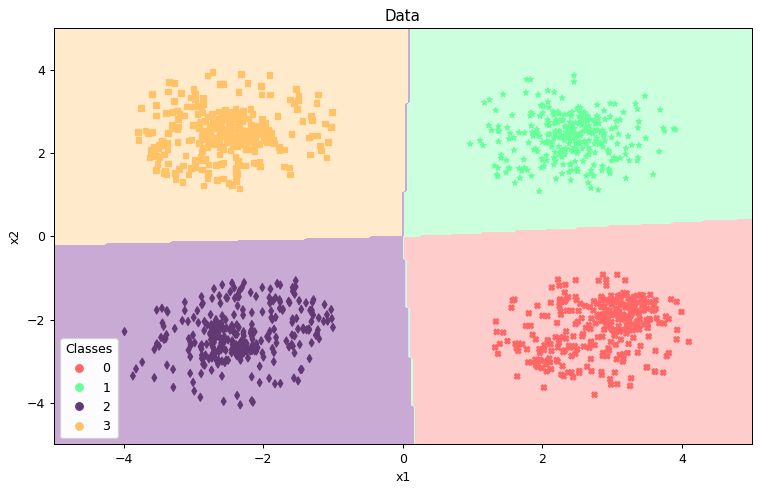

In [139]:
usu.drawSVM(data,ref,theta)

Rozhodněte o přiřazení ke třídám pro body [1, 4] a [3, -2]


In [93]:
#################################################################
point = np.array([1, 1, 4], ndmin=2)
theta.shape, point.shape
point @ theta #class = green, protoze nejvyssi hodnota je na indexu 1

#################################################################


array([[-3.14871446,  2.20563986, -4.89606484,  0.83874282]])

In [95]:
#################################################################
point = np.array([1,3,-2], ndmin=2)
theta.shape, point.shape
point @ theta #class= red, protoze nejvyssi hodnota je na indexu 0

array([[ 2.87156518, -0.22903019, -1.63582943, -4.71783364]])

## 5 Tříd 

In [96]:

npzfile = np.load('data/data_07_5cl.npz')


data = npzfile['data']
ref = npzfile['ref']

theta = theta_SGD_test(data,ref)
theta



/tmp/ipykernel_100625/1621158983.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  margins[i,j] = scores[i,j] - scores[i,ref[i]] + 1


array([[-1.19546194, -1.19446239, -1.19446239, -1.19446239, -1.19446239],
       [ 0.74128961,  0.61997805, -0.79627311, -0.85804877, -0.08010647],
       [-0.77817451,  0.59064136, -0.83094691,  0.61822607, -0.0970577 ]])

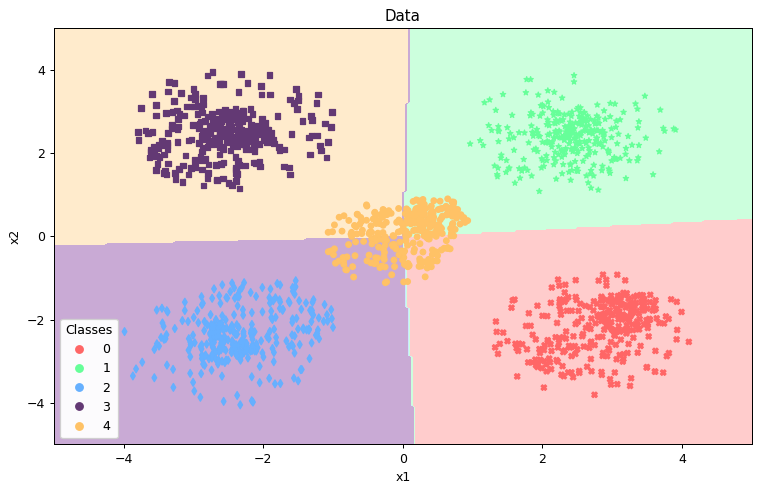

In [97]:
usu.drawSVM(data,ref,theta)